# Предсказание сердечнососудистых заболеваний
1. **age** - возраст пациента в днях
2. **gender** - пол пациента (1 - женский, 2 - мужской)
3. **height** - рост пациента в сантиметрах
4. **weight** - вес пациетна в килограммах
5. **ap_hi** - верхнее артериальное давлеие
6. **ap_lo** - нижнее артериальное давлеие
7. **cholesterol** - уровень холестерина (1 - нормальный, 2 - выше наромального, 3 - сильно выше нормального)
8. **gluc** - уровень сахара в крови (1 - нормальный, 2 - выше наромального, 3 - сильно выше нормального)
9. **smoke** - курит ли пациент (0 - нет, 1 - да)
10. **alco** - употребляет ли пациент алкоголь (0 - нет, 1 - да)
11. **active** - физическая активность (0 - нет, 1 - да)
12. **cardio** - есть ли у пациента сердечнососудистые заболевания(0 - нет, 1 - да)  
Требуется по первым 11 признакам понять есть ли у пациента сердечнососудистые заболевания

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("cardio.csv", sep=";")
data['age']/=365.25 # convert days to years
data = data.drop('id',axis=1)
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.302632,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.754995,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,29.563313,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.361396,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.946612,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.387406,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Пропущенных значений нет

In [4]:
data['gender'] = data['gender'].astype('category')
data['gender'].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

In [5]:
data['smoke'] = data['smoke'].astype('category')
data['smoke'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [6]:
data['alco'] = data['alco'].astype('category')
data['alco'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [7]:
data['active'] = data['active'].astype('category')
data['active'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [8]:
data['cardio'] = data['cardio'].astype('category')
data['cardio'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [9]:
data['cholesterol'] = pd.Categorical(data['cholesterol'], ordered=True)
data['cholesterol'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=True)

In [10]:
data['gluc'] = pd.Categorical(data['cholesterol'], ordered=True)
data['gluc'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=True)

In [11]:
data.describe(include=['category'])

,gender,cholesterol,gluc,smoke,alco,active,cardio
count,69301,69301,69301,69301,69301,69301,69301
unique,2,3,3,2,2,2,2
top,1,1,1,0,0,1,0
freq,45079,51868,51868,63199,65567,55717,34679


In [12]:
data.describe()

,age,height,weight,ap_hi,ap_lo
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.302632,164.362217,74.203027,128.829584,96.650092
std,6.754995,8.205337,14.383469,154.775805,189.096240
min,29.563313,55.000000,10.000000,-150.000000,-70.000000
25%,48.361396,159.000000,65.000000,120.000000,80.000000
50%,53.946612,165.000000,72.000000,120.000000,80.000000
75%,58.387406,170.000000,82.000000,140.000000,90.000000
max,64.922656,250.000000,200.000000,16020.000000,11000.000000


In [13]:
def rows_to_drop(data,feature,min,max):
    rtd = data[(data[feature].quantile(max)< data[feature]) | (data[feature].quantile(min)>data[feature])]
    return rtd.index

In [14]:
data['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    39.437372
0.010    39.605749
0.050    41.256674
0.100    43.364819
0.500    53.946612
0.900    61.982204
0.950    63.676934
0.990    64.309377
0.995    64.454483
Name: age, dtype: float64

In [15]:
data = data.drop(rows_to_drop(data,'age',0.005,0.995))


In [16]:
data['weight'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     45.0
0.010     48.0
0.050     55.0
0.100     58.0
0.500     72.0
0.900     93.0
0.950    100.0
0.990    117.0
0.995    125.0
Name: weight, dtype: float64

In [17]:
data = data.drop(rows_to_drop(data,'weight',0.005,0.995))

In [18]:
data['height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    145.0
0.010    147.0
0.050    152.0
0.100    155.0
0.500    165.0
0.900    175.0
0.950    178.0
0.990    184.0
0.995    186.0
Name: height, dtype: float64

In [19]:
data = data.drop(rows_to_drop(data,'height',0.005,0.995))

In [20]:
data['ap_lo'].quantile([0.005,.01,.05,.1,.5,.9,.95,.98,.985,.986,0.987,.99,.995])

0.005      60.000
0.010      60.000
0.050      70.000
0.100      70.000
0.500      80.000
0.900      90.000
0.950     100.000
0.980     110.000
0.985     120.000
0.986     140.000
0.987     901.787
0.990    1000.000
0.995    1000.000
Name: ap_lo, dtype: float64

In [21]:
data = data.drop(rows_to_drop(data,'ap_lo',0.005,0.986))

In [24]:
data['ap_hi'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     90.0
0.010     90.0
0.050    100.0
0.100    110.0
0.500    120.0
0.900    150.0
0.950    160.0
0.990    180.0
0.995    180.0
Name: ap_hi, dtype: float64

In [25]:
data = data.drop(rows_to_drop(data,'ap_hi',0.005,0.995))

In [26]:
data.describe()

,age,height,weight,ap_hi,ap_lo
count,65731.000000,65731.000000,65731.000000,65731.000000,65731.000000
mean,53.304731,164.459844,73.915982,126.420152,81.296238
std,6.663075,7.528713,13.381992,15.903621,9.176364
min,39.438741,145.000000,45.000000,90.000000,60.000000
25%,48.443532,159.000000,65.000000,120.000000,80.000000
50%,53.938398,165.000000,72.000000,120.000000,80.000000
75%,58.338125,170.000000,82.000000,140.000000,90.000000
max,64.454483,186.000000,125.000000,180.000000,140.000000


In [27]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)


No handles with labels found to put in legend.


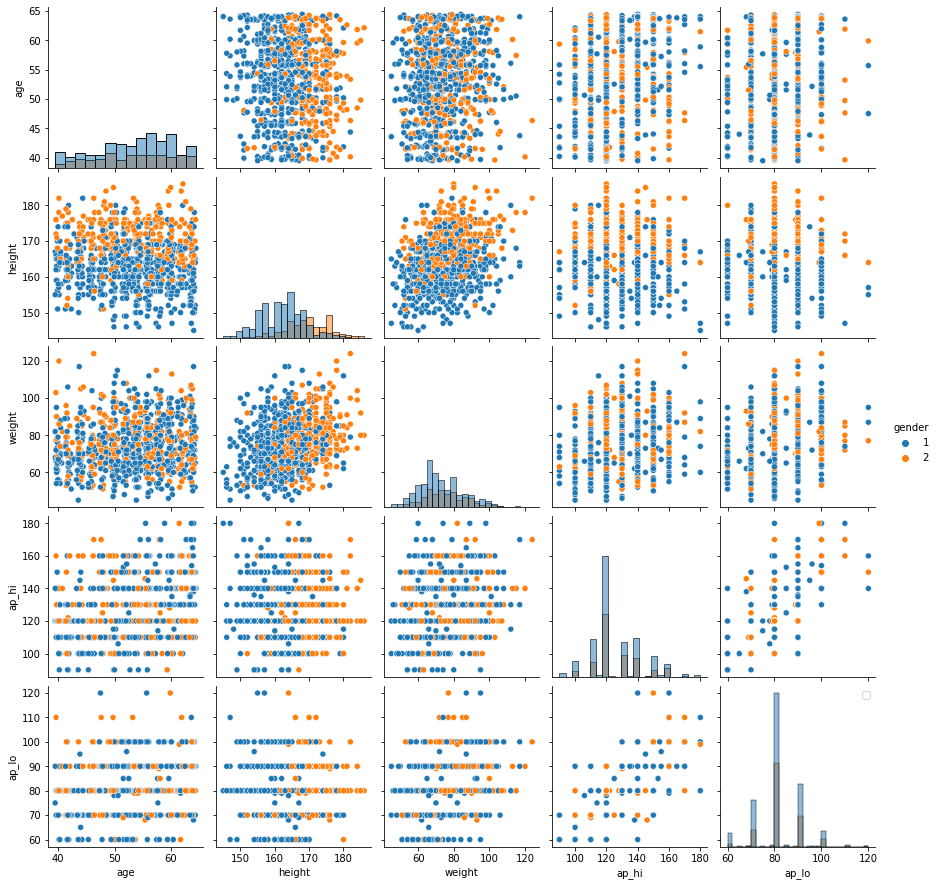

In [34]:
sns.pairplot(data.iloc[random_subset], hue='gender', diag_kind='hist')
plt.legend()
pass

На графиках видно, что мужчины  имеют больший вест и рост

D:\pycharm\ml\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


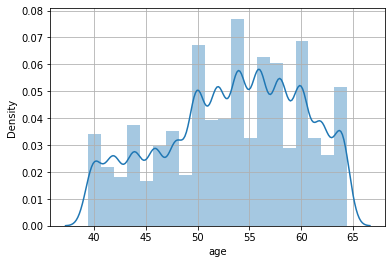

In [35]:
sns.distplot(data['age'], bins=20)
plt.grid()
pass


In [36]:
corr_mat = data.corr()
corr_mat

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.086571,0.064309,0.210660,0.153798
height,-0.086571,1.000000,0.297873,0.012375,0.029239
weight,0.064309,0.297873,1.000000,0.264256,0.244252
ap_hi,0.210660,0.012375,0.264256,1.000000,0.721354
ap_lo,0.153798,0.029239,0.244252,0.721354,1.000000


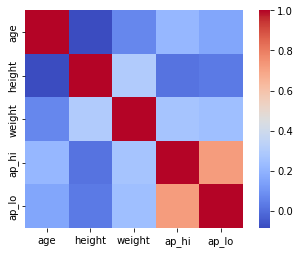

In [37]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Верхнее и нижнее давления оказались сильно скоррелированными.

In [38]:
data.describe(include=['category'])

,gender,cholesterol,gluc,smoke,alco,active,cardio
count,65731,65731,65731,65731,65731,65731,65731
unique,2,3,3,2,2,2,2
top,1,1,1,0,0,1,0
freq,42849,49371,49371,59986,62245,52854,33280


In [39]:
data['gender'] = pd.factorize(data['gender'])[0]
data['cholesterol'] = pd.factorize(data['cholesterol'])[0]
data['gluc'] = pd.factorize(data['gluc'])[0]
data['smoke'] = pd.factorize(data['smoke'])[0]
data['alco'] = pd.factorize(data['alco'])[0]
data['active'] = pd.factorize(data['active'])[0]
y = data['cardio']
X = data.drop('cardio',axis=1)
X = (X - X.mean(axis = 0))/X.std(axis = 0)

In [40]:
X.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,6.573100e+04,6.573100e+04,6.573100e+04,6.573100e+04,6.573100e+04,6.573100e+04,6.573100e+04,6.573100e+04,6.573100e+04,6.573100e+04,6.573100e+04
mean,-4.742825e-18,1.252322e-16,-1.459979e-15,1.351232e-18,-6.342684e-17,-5.460329e-16,-8.034427e-17,-8.034427e-17,-5.823811e-18,-1.880915e-17,-1.691743e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.081020e+00,-7.307576e-01,-2.584750e+00,-2.160813e+00,-2.290054e+00,-2.320771e+00,-1.966048e+00,-1.966048e+00,-3.094687e-01,-2.366509e-01,-4.935886e-01
25%,-7.295729e-01,-7.307576e-01,-7.252028e-01,-6.662671e-01,-4.036912e-01,-1.412583e-01,3.997956e-02,3.997956e-02,-3.094687e-01,-2.366509e-01,-4.935886e-01
50%,9.510135e-02,-7.307576e-01,7.174613e-02,-1.431761e-01,-4.036912e-01,-1.412583e-01,3.997956e-02,3.997956e-02,-3.094687e-01,-2.366509e-01,-4.935886e-01
75%,7.554160e-01,1.368422e+00,7.358702e-01,6.040968e-01,8.538840e-01,9.484979e-01,3.997956e-02,3.997956e-02,-3.094687e-01,-2.366509e-01,-4.935886e-01
max,1.673364e+00,1.368422e+00,2.861067e+00,3.817370e+00,3.369034e+00,6.397279e+00,2.046007e+00,2.046007e+00,3.231295e+00,4.225569e+00,2.025948e+00


In [41]:
X2 = X.drop('ap_lo',axis=1)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(49298, 16433)

In [43]:
from sklearn import neighbors
for k in [1,3,5,10,50,100]:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    print(k, np.mean(model.predict(X_test) != y_test),np.mean(model.predict(X_train) != y_train) )

D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


1 0.35964218341142823 0.0002028479857195018


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


3 0.31923568429379906 0.18183293439896142


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


5 0.3060305482869835 0.21919753336849365


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


10 0.28448852917909084 0.24579090429632033


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


50 0.27359581330250105 0.26479776055823767


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


100 0.27237875007606643 0.2676984867540265


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(49298, 16433)

In [45]:
from sklearn import neighbors
for k in [1,3,5,10,50,100]:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    print(k, np.mean(model.predict(X_test) != y_test),np.mean(model.predict(X_train) != y_train) )

D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


1 0.3639019047039494 0.00024341758286340216


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


3 0.3236779650702854 0.18187350399610533


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


5 0.3094383253210004 0.2191366789727778


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


10 0.2892959289235076 0.24546634751916913


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


50 0.27298728168928377 0.264250070996795


D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\pycharm\ml\.venv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


100 0.2750562891742226 0.26968639701407765


# Выводы
1. Увеличение параметра k приводит к уменьшению ошибки на тестовой выборке и увеличению на обучающей.
2. Удаление одного из двух сильно скоррелированных признаков приводит к незначительному ухудшению результата, но производительность от этого улучшается.  